In [13]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

In [14]:
import seaborn as sns

In [15]:
df = pd.read_csv("data-03-diabetes.csv",header=None)

In [16]:
df.head(1)

,0,1,2,3,4,5,6,7,8
0,-0.294118,0.487437,0.180328,-0.292929,0.0,0.00149,-0.53117,-0.033333,0


In [29]:
xdata = df.iloc[:,:-1]
ydata = df.iloc[:,-1]

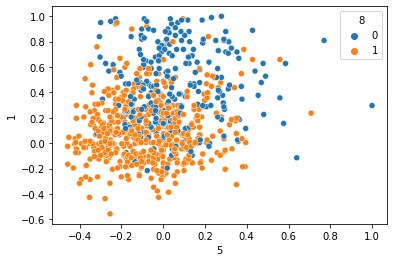

In [17]:
sns.scatterplot(data=df , x=df[5],y=df[1],hue=df[8])

In [54]:
neg = df[df[8]==0]
pos = df[df[8]==1]

In [55]:
# neg.iloc[-1] = neg.iloc[-1].astype('float32')
# pos.iloc[-1] = pos.iloc[-1].astype('float32')

In [56]:
neg.shape , pos.shape

((263, 9), (496, 9))

In [51]:
# neg = np.array(neg)
# pos = np.array(pos)

In [57]:
neg.shape,pos.shape

((263, 9), (496, 9))

In [58]:
x_neg = neg.iloc[:,:-1]
y_neg = neg.iloc[:,-1]

x_pos = pos.iloc[:,:-1]
y_pos = pos.iloc[:,-1]

In [64]:
pca=PCA(n_components=5)
pca2=PCA(n_components=5)

In [65]:
x_neg_pca = pca.fit_transform(neg.iloc[:,:-1])
x_pos_pca = pca2.fit_transform(pos.iloc[:,:-1])

In [77]:
x_neg_pca.shape

(263, 5)

In [67]:
x_pos_pca.shape

(496, 5)

In [137]:
po = GibbsSampling(3000,x_pos_pca)
pos_sam = po.data_sampling()

In [138]:
pos_sam.shape

(3000, 5)

In [139]:
ne=GibbsSampling(3000,x_neg_pca)
neg_sam = ne.data_sampling()

In [140]:
x_neg_final = np.concatenate((x_neg_pca,neg_sam),axis=0)

In [141]:
x_neg_final.shape

(3263, 5)

In [142]:
x_pos_final = np.concatenate((x_pos_pca,pos_sam),axis=0)

In [143]:
x_pos_final.shape

(3496, 5)

In [144]:
y_pos = np.ones(x_pos_final.shape[0],dtype=int)
y_neg = np.zeros(x_neg_final.shape[0],dtype=int)

In [145]:
x_data = np.concatenate((x_pos_final,x_neg_final),axis=0)
y_data = np.concatenate((y_pos,y_neg))

In [146]:
from sklearn.ensemble import RandomForestClassifier
from gibbs_sampling import GibbsSampling

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
x_data.shape ,y_data.shape

((6759, 5), (6759,))

In [149]:
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data, test_size=0.2)

In [150]:
clf = RandomForestClassifier()

In [151]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [152]:
clf.score(x_train,y_train)

1.0

In [153]:
clf.score(x_test,y_test)

0.9556213017751479

In [154]:
from sklearn.metrics import classification_report

In [155]:
y_pred = clf.predict(x_test)

In [156]:
print(classification_report(y_test, y_pred, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.97      0.94      0.95       659
     class 1       0.94      0.97      0.96       693

    accuracy                           0.96      1352
   macro avg       0.96      0.96      0.96      1352
weighted avg       0.96      0.96      0.96      1352



In [132]:
xtrn,xtst,ytrn,ytst = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.3)

In [133]:
clf2 = RandomForestClassifier()


In [134]:
clf2.fit(xtrn,ytrn)

RandomForestClassifier()

In [135]:
clf2.score(xtrn,ytrn)

1.0

In [136]:
clf2.score(xtst,ytst)

0.75

In [157]:
pre2 = clf2.predict(xtst)

In [160]:
print(classification_report(ytst,  pre2, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.60      0.62      0.61        72
     class 1       0.82      0.81      0.82       156

    accuracy                           0.75       228
   macro avg       0.71      0.72      0.71       228
weighted avg       0.75      0.75      0.75       228

